In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

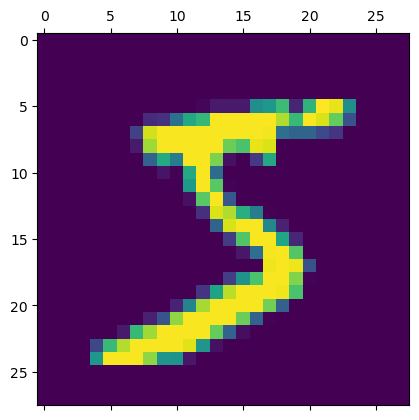

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [17]:
X_train_flatten.shape

(60000, 784)

In [18]:
X_test_flatten.shape

(10000, 784)

In [40]:
#No hidden layers
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4684 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9259


In [41]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2659 - accuracy: 0.9273


[0.2658821940422058, 0.927299976348877]

In [21]:
y_pred=model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


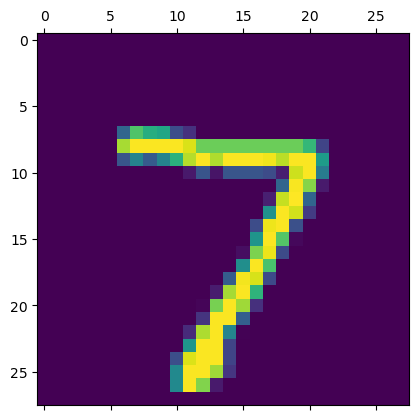

In [24]:
plt.matshow(X_test[0])

In [25]:
y_pred[0]

array([2.77420525e-02, 3.63218334e-07, 6.53168187e-02, 9.51133668e-01,
       2.12140800e-03, 1.10264026e-01, 1.48218987e-06, 9.99797165e-01,
       1.07142344e-01, 6.70730472e-01], dtype=float32)

In [31]:
y_test[0]

7

In [27]:
# we are having y_pred as matrix but y_test is having values so we are taking maximum element from the matrix
np.argmax(y_pred[0])

7

In [30]:
y_pred_labels=[np.argmax(i)for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   10,  915,   17,    9,    5,   13,   10,   42,    5],
       [   4,    0,   20,  916,    0,   27,    2,   11,   21,    9],
       [   2,    1,    4,    1,  922,    0,    7,    4,   10,   31],
       [   9,    3,    2,   27,    9,  790,   11,    5,   29,    7],
       [  13,    3,    7,    0,    8,   15,  907,    2,    3,    0],
       [   1,    5,   24,    3,    6,    1,    0,  958,    2,   28],
       [   7,   11,    6,   17,    9,   37,    8,   11,  860,    8],
       [  11,    7,    1,   10,   28,    9,    0,   25,    4,  914]])>

Text(95.72222222222221, 0.5, 'Truth')

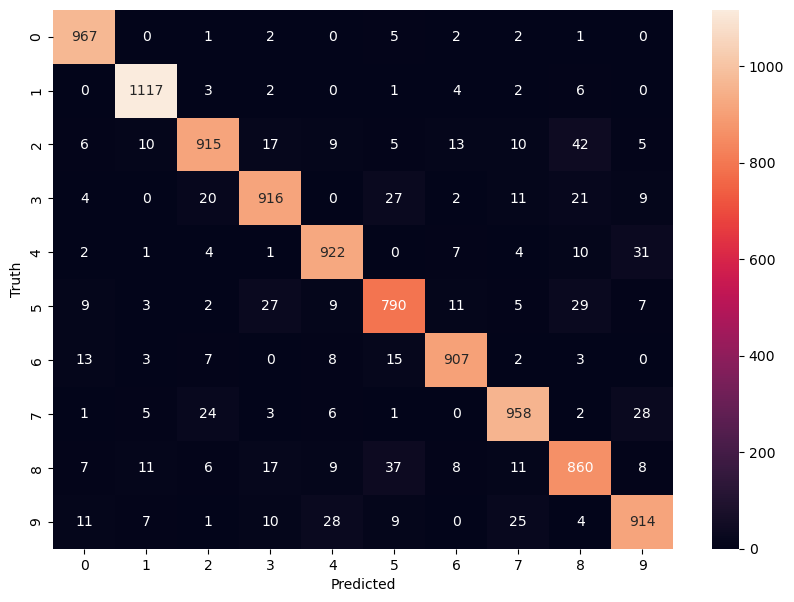

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
#Adding hidden layers
model=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1862 - accuracy: 0.9429
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0753 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0488 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0278 - accuracy: 0.9906


In [43]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.9808


[0.06784117221832275, 0.9807999730110168]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

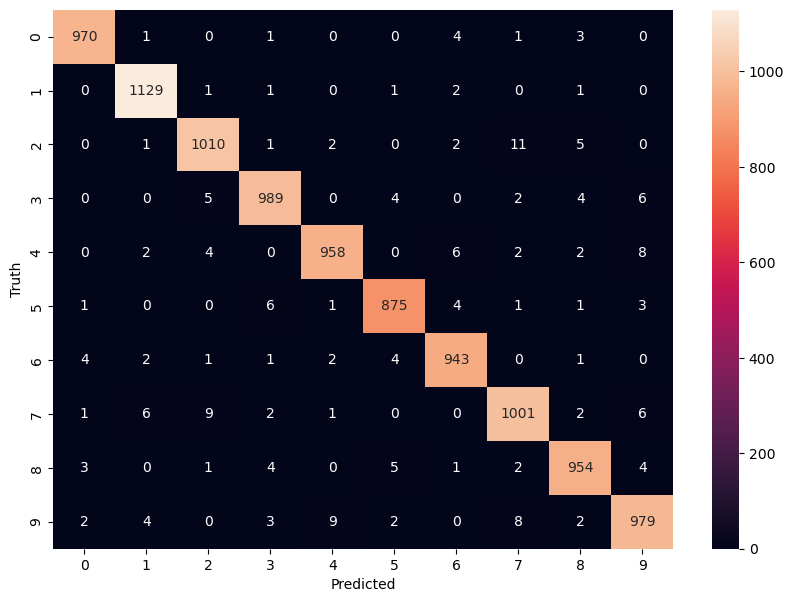

In [44]:
y_pred=model.predict(X_test_flatten)
y_pred_labels=[np.argmax(i)for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')